<a href="https://colab.research.google.com/github/ajithpious/DeepSpeech/blob/master/Project_BRFSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Heart Disease Prediction using Behavioral Risk Factor Surveillance System (BRFSS) dataset

Heart disease is one of the most significant causes of mortality in the world today. Prediction of cardiovascular disease is a critical challenge in the area of clinical data analysis. Machine learning (ML) has been shown to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry. The Behavioral Risk Factor Surveillance System (BRFSS) is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. This project analyses the BRFSS dataset and finds  the significant features that are responsible for the Heart Disease

# Loading the Data


In [87]:
# importing the necessary libraries for the project
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Creating a pandas dataframe from a csv file
# link to the dataset https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system#2015.csv
df=pd.read_csv('/content/drive/MyDrive/Data/Project_BRFSS/2015.csv')

In [89]:
# Dimension of the pandas dataframe
df.shape

(441456, 330)

In [90]:
# The data contains 330 columns. Setting the maximum column to 400
pd.set_option('display.max_columns', 400)

In [91]:
# displaying the first 10 rows of the dataframe
df.head(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

# Factors Influencing Heart Disease
The BRFSS data set has 330 columns. Not all the columns are significant for the prediction of heart disease.A quick reseach in heart disease showed us that only a subset of features are significant in the influencing heart disease

##### **Risk Factors of Heart Disease**

*   obesity
*   age
*   sex
*   diet
*   exercise
*   alcohol consumption
*   BMI
*   Household Income
*   Marital Status
*   Sleep
*   Time since last checkup
*   Education
*   Health care coverage
*   Mental Health
*   blood pressure (high)
*   cholesterol (high)
*   smoking
*   diabetes








### Selecting the Risk Factors From BRFSS Dataset

The Above mentioned risk factors are selected from the BRFSS dataset. To understand the column code in BRFSS data i have looked  into the BRFSS codebook

**BRFSS 2015 Codebook:** https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

The **selected features** from the BRFSS 2015 dataset are:

**Response Variable / Dependent Variable:**
*   Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) --> _MICHD


**Independent Variables:**

**High Blood Pressure**
*   Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> _RFHYPE5

**High Cholesterol**
*   Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? --> TOLDHI2
*   Cholesterol check within past five years --> _CHOLCHK

**BMI**
*   Body Mass Index (BMI) --> _BMI5

**Smoking**
*   Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> SMOKE100

**Other Chronic Health Conditions**
*   (Ever told) you had a stroke. --> CVDSTRK3
*   (Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If Respondent says pre-diabetes or borderline diabetes, use response code 4.) --> DIABETE3

**Physical Activity**
*   Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> _TOTINDA

**Diet**
*   Consume Fruit 1 or more times per day --> _FRTLT1
*   Consume Vegetables 1 or more times per day --> _VEGLT1

**Alcohol Consumption**
*   Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> _RFDRHV5

**Health Care**
*   Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?  --> HLTHPLN1
*   Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> MEDCOST

**Health General and Mental Health**
*   Would you say that in general your health is: --> GENHLTH
*   Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> MENTHLTH
*   Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> PHYSHLTH
*   Do you have serious difficulty walking or climbing stairs? --> DIFFWALK

**Demographics**
*   Indicate sex of respondent. --> SEX
*   Fourteen-level age category --> _AGEG5YR
*   What is the highest grade or year of school you completed? --> EDUCA
*   Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") --> INCOME2

# Data Cleaning 

##Selecting Subset of Features

In [92]:
sel_features=['DIABETE3','_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5','SMOKE100', 'CVDSTRK3', '_MICHD', '_TOTINDA', '_FRTLT1', '_VEGLT1', '_RFDRHV5', 
'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK','SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]
df=df[sel_features]
df.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,NaN,9.0,9.0,9.0,9.0,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,1.0,1.0,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


In [93]:
# shape of the Data frame after selecting the Risk Factors
df.shape

(441456, 22)

## Cleaning the Missing Values

In [94]:
# lets view the missing values in data set
df.isna().sum()

DIABETE3        7
_RFHYPE5        0
TOLDHI2     59154
_CHOLCHK        0
_BMI5       36398
SMOKE100    14255
CVDSTRK3        0
_MICHD       3942
_TOTINDA        0
_FRTLT1         0
_VEGLT1         0
_RFDRHV5        0
HLTHPLN1        0
MEDCOST         1
GENHLTH         2
MENTHLTH        0
PHYSHLTH        1
DIFFWALK    12334
SEX             0
_AGEG5YR        0
EDUCA           0
INCOME2      3301
dtype: int64

In [95]:
# Droppping the Rows with NA values
df=df.dropna()
# reset the index of the dataframe
df=df.reset_index(drop=True)
df.head()


,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
3,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,1.0,1.0,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0
4,3.0,2.0,2.0,1.0,2652.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,88.0,88.0,2.0,2.0,11.0,3.0,6.0


In [96]:
# del df
# df=df_copy.copy()

## Modifying the column values
Most of the column has values which are not relevent for the analysis like Does not respond,Refused etc... Such values have to be cleaned before Analysis

In [97]:
#1 Diabetic(DIABETE3)
# Making this column ordinal by taking 0 for no diabetes or only during pregnancy,1 for prediabetes, or borderline diabetes
# and 2 for yes diabetes
df['DIABETE3']=df['DIABETE3'].replace({1:2,4:1,2:0,3:0})
# Removing 7(dont know) and 9(refused)
df=df[(df['DIABETE3']!=7)]
df=df[df['DIABETE3']!=9]
df['DIABETE3'].value_counts()

0.0    287216
2.0     49500
1.0      6516
Name: DIABETE3, dtype: int64

In [98]:
#2 Hypertension(_RFHYPE5)
#Changing 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
df['_RFHYPE5']=df['_RFHYPE5'].replace({1:0})
df['_RFHYPE5']=df['_RFHYPE5'].replace({2:1})
# Removing the value 9 since it represents refused
df=df[df['_RFHYPE5']!=9]
df['_RFHYPE5'].value_counts()

0.0    191461
1.0    151078
Name: _RFHYPE5, dtype: int64

In [99]:
#3 Cholesterol(TOLDHI2)
# Making 2 to 0 to represent No Cholesterol and 1 to represent Yes
df['TOLDHI2']=df['TOLDHI2'].replace({2:0})
# Removinig 7(Dont know) and 9(Refused)
df=df[df['TOLDHI2']!=7]
df=df[df['TOLDHI2']!=9]
# display the value counts for the column
df['TOLDHI2'].value_counts()


0.0    195042
1.0    144790
Name: TOLDHI2, dtype: int64

In [100]:
#4 Cholesterol check(_CHOLCHK)
# Changing 3 to 0 and 2 to 0 to represent Not checked cholesterol in past 5 years and 1 to reprent Yes

df['_CHOLCHK']=df['_CHOLCHK'].replace({3:0,2:0})

# Remove 9(Refused)
df=df[df['_CHOLCHK']!=9]
df['_CHOLCHK'].value_counts()


1.0    323353
0.0     12137
Name: _CHOLCHK, dtype: int64

In [101]:
#5 Body Mass Index (_BMI5)
# This columsn does not need any modyficating except dividing the column values by 100
df._BMI5=(df['_BMI5']/100).round()


In [102]:
#6 Smoking (SMOKE100)
# Changing 2 to 0 to represent No and 1 for Yes 
df['SMOKE100']=df['SMOKE100'].replace({2:0})

# Removing 7(Dont know) and 9 (Refused)
df=df[df['SMOKE100']!=7]
df=df[df['SMOKE100']!=9]

df['SMOKE100'].value_counts()



0.0    185299
1.0    148230
Name: SMOKE100, dtype: int64

In [103]:
#7 Stroke (CVDSTRK3)
# converting 2 to 0 to represent No and 1 to represent Yes
df['CVDSTRK3']=df['CVDSTRK3'].replace({2:0})

# Removing 7(Dont know) and 9 (Refused)
df=df[df['CVDSTRK3']!=7]
df=df[df['CVDSTRK3']!=9]

# Display the Value Counts
df['CVDSTRK3'].value_counts()


0.0    317898
1.0     14903
Name: CVDSTRK3, dtype: int64

In [104]:
#8 Heart Disease(_MICHD)
# Changing 2 to 0 to represent No and 1 to Represent Yes

df['_MICHD']=df['_MICHD'].replace({2:0})

# Display the Value Counts
df['_MICHD'].value_counts()


0.0    299547
1.0     33254
Name: _MICHD, dtype: int64

In [105]:
#9 Physical Acticity(_TOTINDA)
# Changing 2 to 0 to represnt No Physical Activity
df['_TOTINDA']=df['_TOTINDA'].replace({2:0})

# Removing 9(refused)
df=df[df['_TOTINDA']!=9]

# Display the Value Counts
df['_TOTINDA'].value_counts()

1.0    236353
0.0     81051
Name: _TOTINDA, dtype: int64

In [106]:
#10 Fruit Consumption (_FRTLT1)
# Replacing 2 with 0 to represnt No fruit consumed per day and 1 to represent 1 or more fruit pieces per day
df['_FRTLT1']=df['_FRTLT1'].replace({2:0})

# Removing 9(Refused)
df=df[df['_FRTLT1']!=9]

# Display the Value Counts
df['_FRTLT1'].value_counts()


1.0    197357
0.0    112411
Name: _FRTLT1, dtype: int64

In [107]:
#11 Vegitable Consumption(_VEGLT1)
# Replacing 2 with 0 to represnt no vegetables consumed per day and 1 to represent 1 or more pieces of vegetable per day 
df['_VEGLT1']=df['_VEGLT1'].replace({2:0})

# Removing 9 (Refused)
df=df[df['_VEGLT1']!=9]

# Display the Value Counts
df['_VEGLT1'].value_counts()


1.0    244179
0.0     57981
Name: _VEGLT1, dtype: int64

In [108]:
#12 Alcohol Consumption(_RFDRHV5)
# Changing 1 to 0 to reprent No heavy drining and 2 to 1 for Heavy drining
df['_RFDRHV5'] = df['_RFDRHV5'].replace({1:0, 2:1})

# Removing 9 (Refused)
df = df[df._RFDRHV5 != 9]

# Display value counts
df['_RFDRHV5'].value_counts()

0.0    282758
1.0     15879
Name: _RFDRHV5, dtype: int64

In [109]:
#13 Health Care (HLTHPLN1)
# 1 is yes, change 2 to 0 because it is No health care access
df['HLTHPLN1'] = df['HLTHPLN1'].replace({2:0})

# remove 7 and 9 for don't know or refused
df = df[df['HLTHPLN1'] != 7]
df = df[df['HLTHPLN1'] != 9]

# Display value counts
df['HLTHPLN1'].value_counts()

1.0    283420
0.0     14725
Name: HLTHPLN1, dtype: int64

In [110]:
#14 Hospital Access Due to Cost(MEDCOST)
# Changing 2 to 0 to represnt No
df['MEDCOST'] = df['MEDCOST'].replace({2:0})

# Removing 7(Dont know) and 9(refused)
df = df[df['MEDCOST'] != 7]
df = df[df['MEDCOST'] != 9]

# Display value counts
df['MEDCOST'].value_counts()

0.0    272739
1.0     24970
Name: MEDCOST, dtype: int64

In [111]:
#15 General Health(GENHLTH)
# This is an ordinal variable represneting 1 for excellent healtha and 5 for poort health
# Removing 7(Dont know) and 9(refused)
df = df[df.GENHLTH != 7]
df = df[df.GENHLTH != 9]
df.GENHLTH.value_counts()

2.0    101963
3.0     89461
1.0     51838
4.0     38892
5.0     15040
Name: GENHLTH, dtype: int64

In [112]:
#16 Mental Health in last 30 days( MENTHLTH)
# Chnaging 88 to 0 to represnt 0 bad mental health days
df['MENTHLTH'] = df['MENTHLTH'].replace({88:0})

# Removing 77(dont know) and 99(refused)
df = df[df.MENTHLTH != 77]
df = df[df.MENTHLTH != 99]

df.MENTHLTH.value_counts()

0.0     205204
2.0      14744
30.0     14100
5.0      10147
1.0       9622
3.0       8361
10.0      7212
15.0      6348
4.0       4288
20.0      3878
7.0       3536
25.0      1361
14.0      1349
6.0       1147
8.0        732
12.0       465
28.0       374
21.0       257
29.0       188
18.0       114
9.0        112
16.0       102
27.0        92
22.0        69
17.0        60
26.0        51
13.0        50
23.0        44
11.0        42
24.0        35
19.0        18
Name: MENTHLTH, dtype: int64

In [113]:
#17 Physical health in last 30 days(PHYSHLTH)
# Changing 88 to 0 to reprent 0 bad physical health days
df['PHYSHLTH'] = df['PHYSHLTH'].replace({88:0})

# removing 77(dont know) and 99(refused)
df = df[df.PHYSHLTH != 77]
df = df[df.PHYSHLTH != 99]

df.PHYSHLTH.value_counts()

0.0     183251
30.0     22776
2.0      16606
1.0      12725
3.0       9664
5.0       8669
10.0      6385
15.0      5724
7.0       5231
4.0       5162
20.0      3786
14.0      2989
25.0      1529
6.0       1527
8.0        941
21.0       781
12.0       658
28.0       603
29.0       255
9.0        204
18.0       176
16.0       127
27.0       116
17.0       107
22.0        82
24.0        81
13.0        78
26.0        78
11.0        70
23.0        65
19.0        27
Name: PHYSHLTH, dtype: int64

In [114]:
#18 Difficulty in walking(DIFFWALK)
# Changing 2 to 0 to represnt No and 1 to represnt Yes
df['DIFFWALK'] = df['DIFFWALK'].replace({2:0})

# Removing 7(Dont knwow) and 9(Refused)
df = df[df.DIFFWALK != 7]
df = df[df.DIFFWALK != 9]
print(df.DIFFWALK.value_counts())
df['_MICHD'].value_counts()



0.0    239994
1.0     49704
Name: DIFFWALK, dtype: int64


0.0    262016
1.0     27682
Name: _MICHD, dtype: int64

In [115]:
#19 SEX
# Changing 2 to 0 to represen Female and 1 to represent Male
df['SEX'] = df['SEX'].replace({2:0})
df['SEX'].value_counts()

0.0    165738
1.0    123960
Name: SEX, dtype: int64

In [116]:
#20 Age in category of 5 years(_AGEG5YR)
# Removinig 14 since it represnts Dont know or Refused
df = df[df._AGEG5YR != 14]
df._AGEG5YR.value_counts()

9.0     37379
10.0    37206
8.0     34193
7.0     28846
11.0    28021
13.0    22117
6.0     21442
12.0    19510
5.0     17368
4.0     14859
3.0     11928
2.0      8340
1.0      7050
Name: _AGEG5YR, dtype: int64

In [117]:
#21 Education( EDUCA)
# This is an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Values range from 1-6
print(df['EDUCA'].value_counts())

# Remove 9 for refused
df = df[df.EDUCA != 9]
df['EDUCA'].value_counts()


6.0    118834
5.0     79159
4.0     73213
3.0     11420
2.0      5085
9.0       328
1.0       220
Name: EDUCA, dtype: int64


6.0    118834
5.0     79159
4.0     73213
3.0     11420
2.0      5085
1.0       220
Name: EDUCA, dtype: int64

In [118]:
#22 Income(INCOME2)
# Variable is ordinal with 1 being less than $10000 and 8 being more than $75000
# Removing 77(Dont know) and 99(refused)
df = df[df.INCOME2 != 77]
df = df[df.INCOME2 != 99]
df['INCOME2'].value_counts()


8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: INCOME2, dtype: int64

In [119]:
# Shape of the Dataframe after filtering and modifying the values
df.shape

(253680, 22)

In [120]:
# diplaying the Dataframe after modifying the values
df.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
4,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
5,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Renaming the columns to a  readable Format

In [121]:
df = df.rename(columns = {'_MICHD':'HeartDiseaseorAttack','DIABETE3':'Diabetes', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })


In [122]:
# Displaying the rows
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
4,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
5,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Fixing the Imbalanced Data
Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. So the data has to be balanced before we do any analysis and modelling.

In [123]:
# Checking the values counts of the column 'HeartDiseaseorAttack' to determine the balance of the the classification
df['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

The above value count shows that the clasification with Heart Disease has 23893 entries which is less compared to that of data without Heart Disease(229787) 


In [125]:
# Filtering the rows with Heart Disease
hrtAtk_1=df[df['HeartDiseaseorAttack']==1]
print(hrtAtk_1.shape)

# Filtering the rows without Heart Disease
hrtAtk_0=df[df['HeartDiseaseorAttack']==0]

# Sampling 23893 rows from dataframe without heart Disease
hrtAtk_0=hrtAtk_0.sample(hrtAtk_1.shape[0],replace=False)

# Appending both classes (with and without heart Disease)
data=hrtAtk_0.append(hrtAtk_1)

# Reset the index of the dataframe
data=data.reset_index(drop=True)

data['HeartDiseaseorAttack'].value_counts()

(23893, 22)


1.0    23893
0.0    23893
Name: HeartDiseaseorAttack, dtype: int64

In [126]:
# Copy the data to df variable
df=data.copy()

# Visualization

In [127]:
# Describe the data
df.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,0.472607,0.571548,0.546436,0.975202,28.861675,0.523208,0.095970,0.500000,0.703846,0.621542,0.790252,0.046708,0.957226,0.095174,2.892751,3.834491,6.409534,0.277194,0.500167,8.953627,4.913531,5.645712
std,0.836049,0.494860,0.497844,0.155511,6.719112,0.499466,0.294553,0.500005,0.456564,0.485008,0.407133,0.211015,0.202349,0.293459,1.155443,8.269404,10.527120,0.447618,0.500005,2.924945,1.033728,2.176601
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.000000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,9.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,7.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Correlation
Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable(Heart Disease).It gives us the idea about the degree of the relationship of the two variables. It’s a bi-variate analysis measure which describes the association between different variables. In most of the business it’s useful to express one subject in terms of its relationship with others.


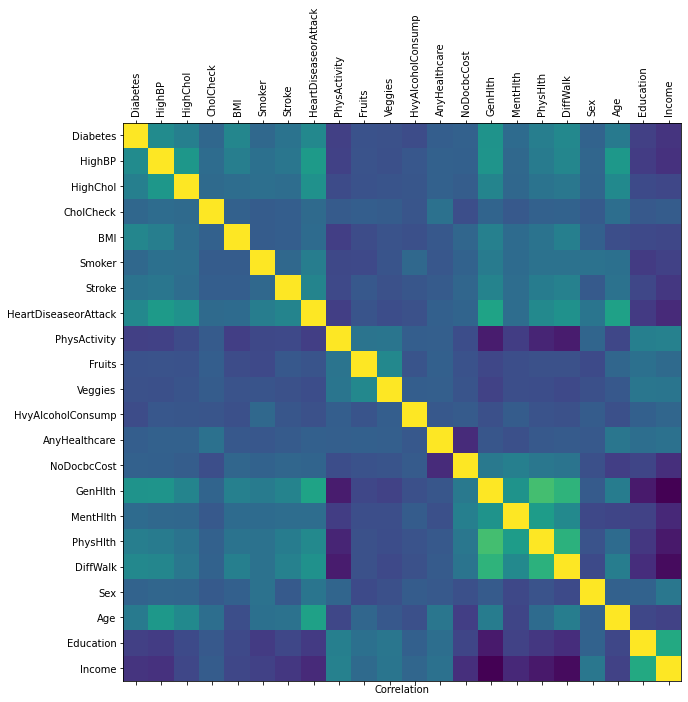

In [155]:
# Finding the correlation between two variable in the dataframe
correlation=df.corr()

# Plotting the correlation between different variables
plt.figure(figsize=(20,10))
plt.matshow(correlation,fignum=1)
plt.xticks(range(len(correlation.columns)),correlation.columns.values,rotation=90)
plt.yticks(range(len(correlation.columns)),correlation.columns.values)
plt.xlabel('Correlation')
plt.show()

In [166]:
# Finding the correlation between target variable and independent variables
cor_tar=corelation.loc['HeartDiseaseorAttack',:]

# Sorting the correlation based on the values and finding the top 5 correlated varibales
corr_cols=cor_tar.sort_values(ascending=False)[1:6]
corr_cols

GenHlth     0.410933
Age         0.402604
HighBP      0.361313
HighChol    0.310806
DiffWalk    0.307813
Name: HeartDiseaseorAttack, dtype: float64

It has been found from the correlation that GenHealth, Age, HighBP, HighChol, DiffWalk are found be correlated to Heart Disease so heart disease have high dependence on these factors

In [189]:
# Function for plotting the bar graph between Heart disease and other varibales
def plot_bar(df,column,title,w,h,labels,xticks,xlabel,ylabel):
  width=0.35
  fig,ax=plt.subplots()
  fig.set_size_inches(w,h)
  val_0=df[df['HeartDiseaseorAttack']==0][column].value_counts()
  val_1=df[df['HeartDiseaseorAttack']==1][column].value_counts()
  bins1=val_1.index-width/2
  bins0=val_0.index+width/2
  ax.bar(bins1,val_1.values,width,color="red",label='Heart Disease')
  ax.bar(bins0,val_0.values,width,color='green',label="No Heart Disease")
  if(labels != None):
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels=labels)
  ax.legend()
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)

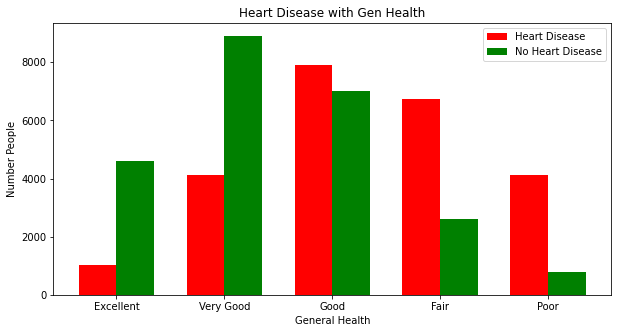

In [190]:
# Bar Graph between General Health and number of people
plot_bar(df,'GenHlth','Heart Disease with Gen Health',10,5,['Excellent','Very Good','Good','Fair','Poor'],range(1,6),"General Health","Number People")


The above plot clearly shows that the ratio of the people with diabetes and without diabetes increases as the general health condition decreases 

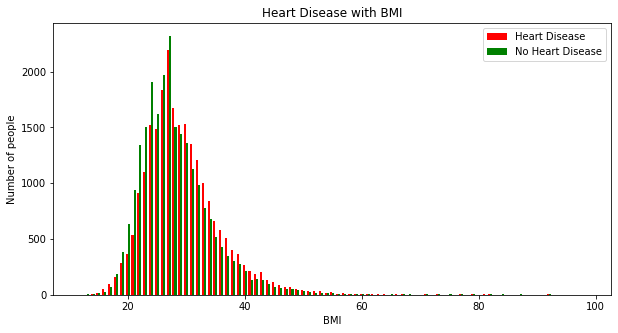

In [191]:
# Bar Graph between BMI and number of people

plot_bar(df,'BMI','Heart Disease with BMI',10,5,None,None,"BMI","Number of people")


From the above graph it can be infered that the mean value of  the BMI lies between 20 and 30 which is the expected BMI value 

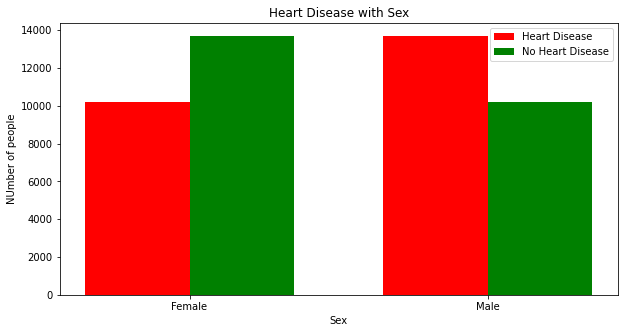

In [193]:
# Bar graph between Sex and Number of people
plot_bar(df,'Sex','Heart Disease with Sex',10,5,['Female','Male'],range(0,2),"Sex",'Number of people')


The above graph indicates that the number of people with Heart disease are males which is the general expected output.

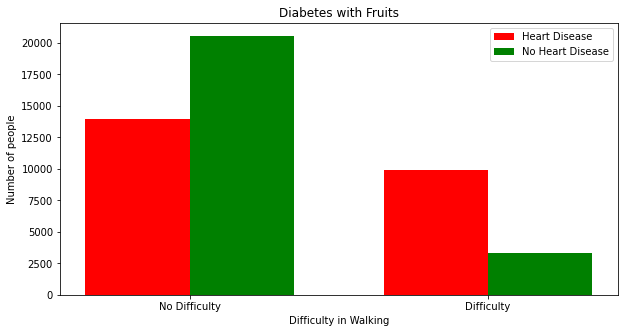

In [194]:
# Bar graph between Difficulty walking and 
plot_bar(df,'DiffWalk','Heart Disease with Diffculty Walking',10,5,['No Difficulty',"Difficulty"],range(0,2),'Difficulty in Walking','Number of people')

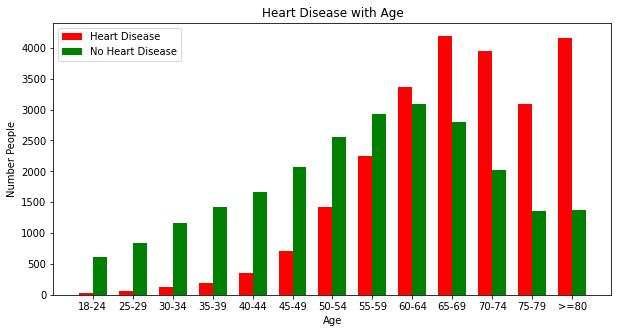

In [198]:
# Bar chart between Age and Number of people
plot_bar(df,'Age','Heart Disease with Age',10,5,['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','>=80']
         ,range(1,14),"Age","Number People")


The above Graph shows that that the number of people with heart disease increase with Age.

# Feature Engineeering

Feature engineering is the process of transforming raw data into features that may be used to build a prediction model using machine learning or statistical modelling techniques such as deep learning. The purpose of feature engineering is to create an input data set that is optimally suited to the machine learning algorithm and to optimise the performance of machine learning models. Feature engineering can aid in this process by reducing the time required to extract variables from data, hence allowing for the extraction of additional variables.


In [199]:
# Spliting the columns between Target variable and Feature variables
features=['Diabetes','Stroke','HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump','GenHlth', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
outcome=['HeartDiseaseorAttack']
seed=7
# Saving the Feature varibles to X
X=df[features]

# Saving the target variable to Y
Y=df[outcome]


## Feature Selection
The selection of features is a critical stage in any machine learning process. It makes it possible for the machine learning system to train more quickly. It simplifies a model's complexity and makes it easier to comprehend. It increases the accuracy of a model and reduces overfitting when the appropriate subset is picked.

A number of methods are available to do the feature selection of varibales.
For categorical varaibles we have the following methods:
* Chi2 Feature Selection
* Mutual Information Feature Selection

I have selected the Chi2 method for feature selection since all my categorical variables are positive


In [204]:

from sklearn.feature_selection import SelectKBest,chi2

# SelectKBest class is used for selcting the first 8 variables that has more dependence on the target variable
# Score function used is the Chi2 
fs=SelectKBest(score_func=chi2,k=8)
# fitting the feature variables and target variables
fs.fit(X,Y)
# sorting the columns based on the chi2 value 
scores,sColumns=zip(*sorted(zip(fs.scores_,features),reverse=True))
# Findinig the Top 8 features that is more suitable for modeling
sColumns=list(sColumns[:8])
sColumns


['Age',
 'Diabetes',
 'GenHlth',
 'DiffWalk',
 'HighBP',
 'Stroke',
 'Income',
 'HighChol']

The top 8 features that depend on the target variable are Age, Diabetes,General Health,Difficulty Walking,Blood Pressure,Stoke,Income and Blood Cholesterol. All the features that showed high correlation during our correlation plot is present in the above selected features which is an expected result

# Modeling

In [201]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

x_train,x_test,y_train,y_test=train_test_split(df[features],df[outcome],test_size=0.33,random_state=seed)
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
# models.append(('SVM',SVC()))

results=[]
names=[]
for name,model in models:
  kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
  result=cross_val_score(model,x_train,y_train,cv=kfold)
  model.fit(x_train,y_train)
  predictions=model.predict(x_test)
  print("Training Accuracy:"+name+":",result.mean())
  print("Test accuracy:"+name+":",accuracy_score(y_test,predictions))
  results.append(result)
  names.append(name)
  
# DiabetesClassifier.fit(x_train,y_train)
# predictions=DiabetesClassifier.predict(x_test)
# accuracy_score(y_test,predictions)

Training Accuracy:LR: 0.7697403567475108
Test accuracy:LR: 0.7703868103994927
Training Accuracy:LDA: 0.7704899370726785
Test accuracy:LDA: 0.7707672796448953
Training Accuracy:KNN: 0.7298535396789065
Test accuracy:KNN: 0.731008243500317
Training Accuracy:CART: 0.6760993646387441
Test accuracy:CART: 0.6766011414077362
Training Accuracy:NB: 0.7363823200159382
Test accuracy:NB: 0.739568801521877


['LR', 'LDA', 'KNN', 'CART', 'NB']

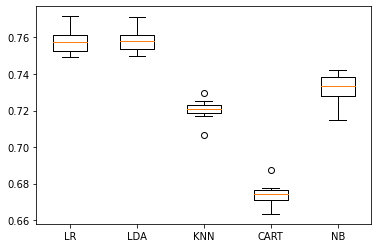

In [64]:
plt.boxplot(results)
plt.xticks(ticks=np.arange(1,len(names)+1),labels=names)
names

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
seed=7
x_train,x_test,y_train,y_test=train_test_split(df[features],df[outcome],test_size=0.33,random_state=seed)

clf=RandomForestClassifier(n_estimators=50,max_depth=None,min_samples_split=3,criterion='entropy', random_state=seed)
clf.fit(x_train,y_train)
scores_ACC = clf.score(x_test, y_test) 
scores_ACC

0.7478912839737581

## Results And Discussion

In [56]:
d=pd.read_csv('/content/drive/MyDrive/Data/Project_BRFSS/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [57]:
d

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [58]:
d['HeartDiseaseorAttack'].value_counts()

0.0    60243
1.0    10449
Name: HeartDiseaseorAttack, dtype: int64